# Store Sales : Data preparation
The goal here is to predict the store sales of Ecadorian Corpoeacion Favorita groceries stores. We will use time series forecasting to predict the sales.

# 1 - Importing librairies

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported')

# check versions
print('Pandas version: ', pd.__version__)
print('Numpy version: ', np.__version__)


Libraries imported
Pandas version:  2.0.0
Numpy version:  1.23.5


# 2 - Global variables initialization

In [2]:
# Path variable
data_folder_path = './data_store_sales/'

print('Data folder path: ', data_folder_path)

Data folder path:  ./data_store_sales/


# 3 - Data loading

In [3]:
# Load data
raw_oil_data = pd.read_csv(data_folder_path + 'oil.csv')
raw_store_data = pd.read_csv(data_folder_path + 'stores.csv')
raw_train_data = pd.read_csv(data_folder_path + 'train.csv')
raw_test_data = pd.read_csv(data_folder_path + 'test.csv')
raw_holiday_data = pd.read_csv(data_folder_path + 'holidays_events.csv')
raw_transaction_data = pd.read_csv(data_folder_path + 'transactions.csv')

print('Data loaded')

Data loaded


# 4 - Data exploration

Before going deeper into the data exploration, we must first understand the date information. Dates are given in the following format: YYYY-MM-DD. The train data goes from 2013-01-01 to 2017-08-15. The test data goes from 2017-08-16 to 2017-08-31. To understand it better, we shall create a way to count the dates in integers starting from 0 (day 0 is 2013-01-01).

In [75]:
from datetime import datetime

# Convert date to numeric
def convert_date_to_numeric(date):
    date = datetime.strptime(date, '%Y-%m-%d')
    reference_date = datetime.strptime('2013-01-01', '%Y-%m-%d')
    return (date - reference_date).days

# Convert numeric to date
def convert_numeric_to_date(numeric):
    reference_date = datetime.strptime('2013-01-01', '%Y-%m-%d')
    return (reference_date + pd.Timedelta(days=numeric)).strftime('%Y-%m-%d')

start_date = '2013-01-01'
end_date = '2017-08-15'

print('2013-01-01 is the day ', convert_date_to_numeric('2013-01-01'))
print('2014-07-09 is the day ', convert_date_to_numeric('2014-07-09'))
print('The day 0 is ', convert_numeric_to_date(0))
print('The day 555 is ', convert_numeric_to_date(555))

2013-01-01 is the day  0
2014-07-09 is the day  554
The day 0 is  2013-01-01
The day 555 is  2014-07-10


## 4.1 - Oil data

First let's check for any missing values in the oil data. And let's have a look at the oil price distributio over time.

In [90]:
# Data labels
oil_data_labels = raw_oil_data.columns
print('Oil data labels: ', oil_data_labels)

# Missing data for each label
print('Missing data for each label in oil data: ')
print(raw_oil_data.isnull().sum())
print('Dates with missing data: ')
print(raw_oil_data[raw_oil_data.isnull().any(axis=1)]['date'])

# Number of rows expected
print('Number of rows expected: ', (convert_date_to_numeric('2017-08-31') - convert_date_to_numeric(start_date) + 1))
print('Number of rows in oil data: ', raw_oil_data.shape[0])



Oil data labels:  Index(['date', 'dcoilwtico'], dtype='object')
Missing data for each label in oil data: 
date           0
dcoilwtico    43
dtype: int64
Dates with missing data: 
0       2013-01-01
14      2013-01-21
34      2013-02-18
63      2013-03-29
104     2013-05-27
132     2013-07-04
174     2013-09-02
237     2013-11-28
256     2013-12-25
261     2014-01-01
274     2014-01-20
294     2014-02-17
338     2014-04-18
364     2014-05-26
393     2014-07-04
434     2014-09-01
497     2014-11-27
517     2014-12-25
522     2015-01-01
534     2015-01-19
554     2015-02-16
588     2015-04-03
624     2015-05-25
653     2015-07-03
699     2015-09-07
757     2015-11-26
778     2015-12-25
783     2016-01-01
794     2016-01-18
814     2016-02-15
843     2016-03-25
889     2016-05-30
914     2016-07-04
959     2016-09-05
1017    2016-11-24
1039    2016-12-26
1044    2017-01-02
1054    2017-01-16
1079    2017-02-20
1118    2017-04-14
1149    2017-05-29
1174    2017-07-03
1175    2017-07-04
Name

Let's first add the missing lines (dates)

In [91]:
# Searching for the missing dates
missing_dates = []
num = 0

for date in range(convert_date_to_numeric(start_date), convert_date_to_numeric('2017-08-31') + 1):
    if raw_oil_data['date'][num] != convert_numeric_to_date(date):
        missing_dates.append(convert_numeric_to_date(date))
    else:
        num += 1

print('Missing dates: ', missing_dates)

# Adding the missing lines
list_of_rows_to_add = []
for i in range(len(missing_dates)):
    list_of_rows_to_add.append({'date' : missing_dates[i], 'dcoilwtico' : np.nan})

raw_oil_data = pd.concat([raw_oil_data, pd.DataFrame(list_of_rows_to_add)], ignore_index=True)

print('Number of rows in oil data: ', raw_oil_data.shape[0])
print('Expected number of rows: ', (convert_date_to_numeric('2017-08-31') - convert_date_to_numeric(start_date) + 1))

# Sorting the data
raw_oil_data = raw_oil_data.sort_values(by=['date'])
raw_oil_data = raw_oil_data.reset_index(drop=True)

'''
# Show data
plt.figure(figsize=(10, 5))
plt.plot(raw_oil_data['dcoilwtico'])
plt.title('Oil price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()
'''
raw_oil_data.head(10)

Missing dates:  ['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13', '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27', '2013-02-02', '2013-02-03', '2013-02-09', '2013-02-10', '2013-02-16', '2013-02-17', '2013-02-23', '2013-02-24', '2013-03-02', '2013-03-03', '2013-03-09', '2013-03-10', '2013-03-16', '2013-03-17', '2013-03-23', '2013-03-24', '2013-03-30', '2013-03-31', '2013-04-06', '2013-04-07', '2013-04-13', '2013-04-14', '2013-04-20', '2013-04-21', '2013-04-27', '2013-04-28', '2013-05-04', '2013-05-05', '2013-05-11', '2013-05-12', '2013-05-18', '2013-05-19', '2013-05-25', '2013-05-26', '2013-06-01', '2013-06-02', '2013-06-08', '2013-06-09', '2013-06-15', '2013-06-16', '2013-06-22', '2013-06-23', '2013-06-29', '2013-06-30', '2013-07-06', '2013-07-07', '2013-07-13', '2013-07-14', '2013-07-20', '2013-07-21', '2013-07-27', '2013-07-28', '2013-08-03', '2013-08-04', '2013-08-10', '2013-08-11', '2013-08-17', '2013-08-18', '2013-08-24', '2013-08-25', '2013-08-31', '2013-09-01', '20

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,NaN
5,2013-01-06,NaN
6,2013-01-07,93.20
7,2013-01-08,93.21
8,2013-01-09,93.08
9,2013-01-10,93.81


In order to fill the missing values we will use a linear interpolation method. As interpolation won't work for the first value, we will use a linear regression to predict it.

Missing data for each label in oil data: 
date          0
dcoilwtico    0
dtype: int64


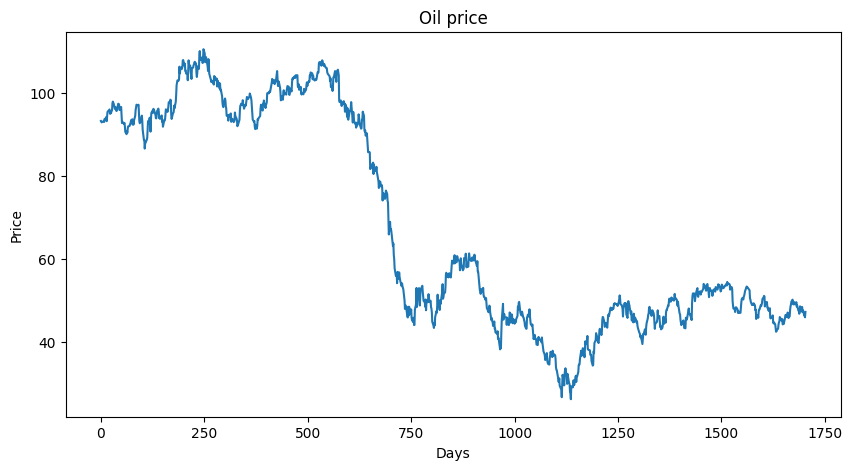

In [92]:
# Interpolation

raw_oil_data.interpolate(method='linear', inplace=True)

# First value fill
second_value = raw_oil_data['dcoilwtico'][1]
third_value = raw_oil_data['dcoilwtico'][2]
first_value = 2 * second_value - third_value
raw_oil_data.loc[0,'dcoilwtico'] = first_value


# Missing data for each label
print('Missing data for each label in oil data: ')
print(raw_oil_data.isnull().sum())


# Show data
plt.figure(figsize=(10, 5))
plt.plot(raw_oil_data['dcoilwtico'])
plt.title('Oil price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

Saving the corrected data

In [93]:
raw_oil_data.to_csv(data_folder_path + 'oil_processed.csv', index=False)

## 4.2 - Store data

Let's have a global look at the store data.

In [32]:
# Global description
print("Columns : ",raw_store_data.columns)
print("Missing values : ",raw_store_data.isnull().sum().sum())
print("Shape : ",raw_store_data.shape)

Columns :  Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')
Missing values :  0
Shape :  (54, 5)


Now, let's tranform categorical data into numerical data.

In [33]:
# Classification data to numerical data
raw_store_data['city'] = pd.factorize(raw_store_data['city'])[0]
raw_store_data['state'] = pd.factorize(raw_store_data['state'])[0]
raw_store_data['type'] = pd.factorize(raw_store_data['type'])[0]

# Global description
raw_store_data.describe()

,store_nbr,city,state,type,cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,27.500000,6.981481,5.296296,1.592593,8.481481
std,15.732133,6.945857,5.105046,1.447425,4.693395
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,14.250000,0.000000,0.000000,0.000000,4.000000
50%,27.500000,6.500000,5.500000,2.000000,8.500000
75%,40.750000,11.750000,8.000000,2.000000,13.000000
max,54.000000,21.000000,15.000000,4.000000,17.000000


Saving the corrected data

In [34]:
raw_store_data.to_csv(data_folder_path + 'stores_processed.csv', index=False)

## 4.3 - Hollidays Events data

Global description

In [35]:
# Global description
print("Columns : ",raw_holiday_data.columns)
print("Missing values : ",raw_holiday_data.isnull().sum().sum())
print("Shape : ",raw_holiday_data.shape)

Columns :  Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')
Missing values :  0
Shape :  (350, 6)


A few modifications are needed : 
* The decription of the events will be set to the type of event that it is. This means the first word to appear in the description except for the transfered events.
* Classification data will not be tranformed into numerical data yet. Thi step will append once the final datasets are created.

In [36]:
# Modifying the description column  
s = {}
for i in range(len(raw_holiday_data)):
    desc = raw_holiday_data.loc[i,'description']
    words = desc.split()
    if words[0] == 'Traslado':
        raw_holiday_data.loc[i,'description'] = words[1]
        if words[1] not in s:
            s[words[1]] = 1
        else:
            s[words[1]] += 1
    else:
        raw_holiday_data.loc[i,'description'] = words[0]
        if words[0] not in s:
            s[words[0]] = 1
        else:
            s[words[0]] += 1
print("New values for the description column and their occurence : ")
print(pd.Series(s))

'''
# Classification data to numerical data
raw_holiday_data['type'] = pd.factorize(raw_holiday_data['type'])[0]
raw_holiday_data['locale'] = pd.factorize(raw_holiday_data['locale'])[0]
raw_holiday_data['locale_name'] = pd.factorize(raw_holiday_data['locale_name'])[0]
raw_holiday_data['transferred'] = pd.factorize(raw_holiday_data['transferred'])[0]
raw_holiday_data['description'] = pd.factorize(raw_holiday_data['description'])[0]
'''

# Global description
raw_holiday_data.describe()


New values for the description column and their occurence : 
Fundacion            80
Provincializacion    24
Cantonizacion        54
Primer               19
Independencia        33
Dia                  21
Navidad-4             6
Navidad-3             6
Navidad-2             6
Puente                5
Navidad-1             6
Navidad               6
Navidad+1             6
Recupero              5
Carnaval             10
Viernes               5
Batalla               7
Inauguracion          1
Mundial              13
Black                 3
Cyber                 3
Terremoto            31
dtype: int64


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,22,2
top,2014-06-25,Holiday,National,Ecuador,Fundacion,False
freq,4,221,174,174,80,338


Saving the corrected data

In [37]:
raw_holiday_data.to_csv(data_folder_path + 'holidays_events_processed.csv', index=False)

## 4.4 - transactions data

This data reference the number of transactions per store and date.

After a quick look at the data, we can see that for some of the dates, some stores are missing. This can be due to an inexistance of the store at the time, or to a missing data. Let's clear this up and see what's happening store by store.

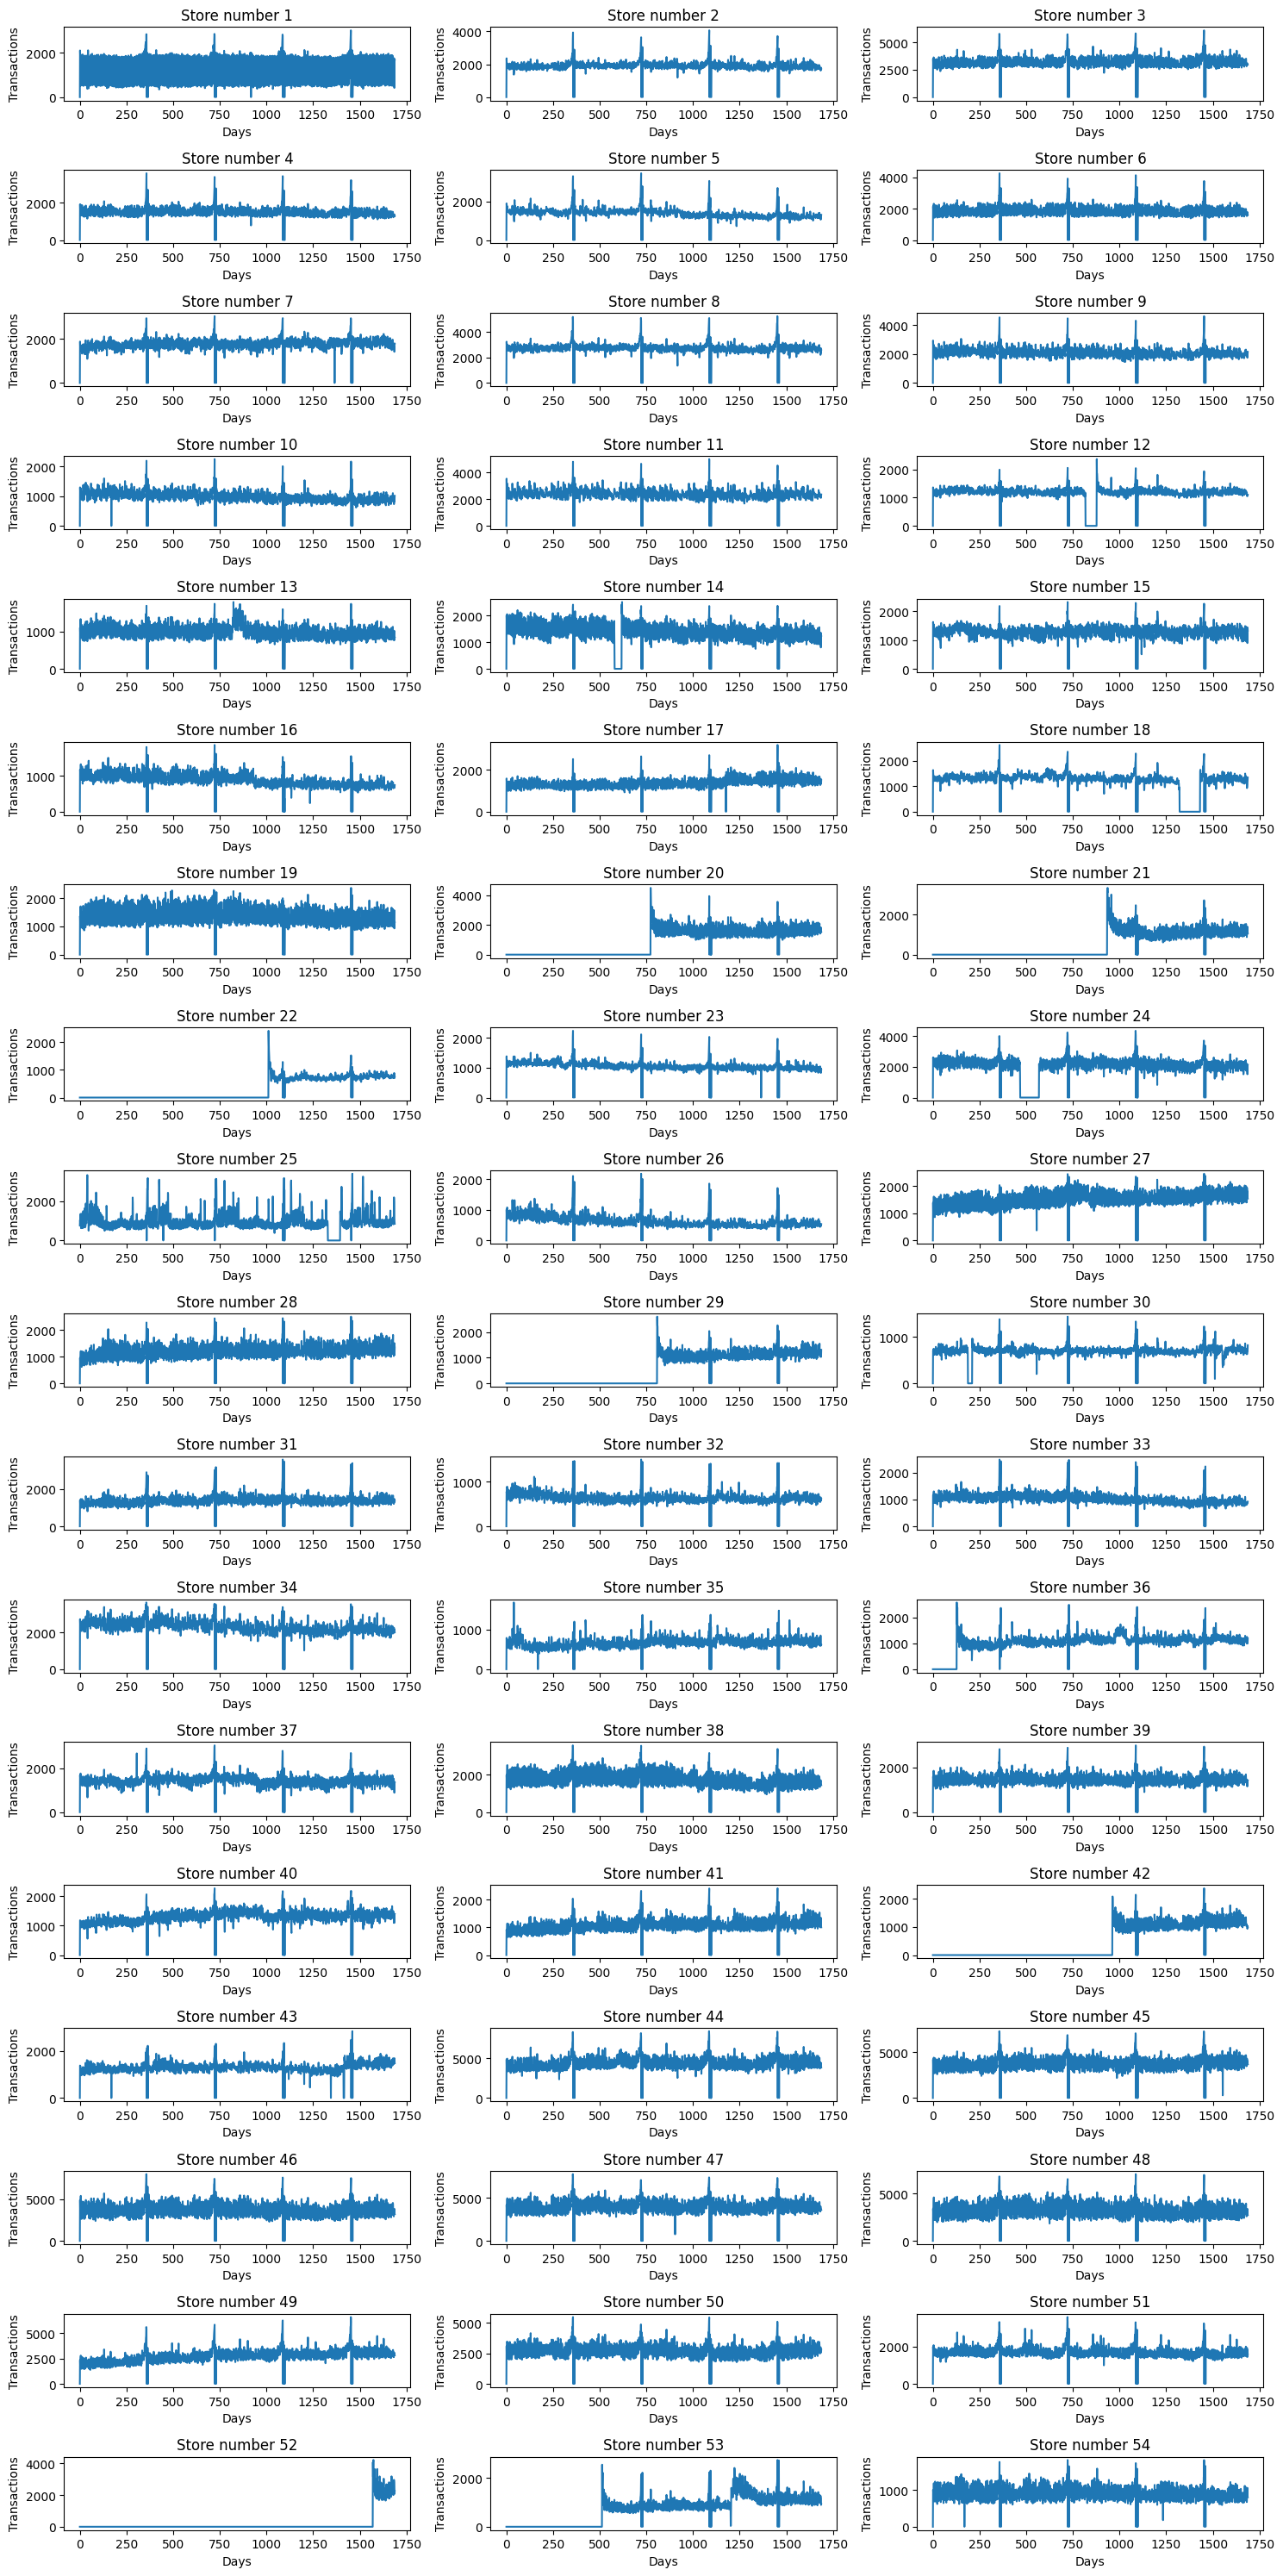

In [38]:


# division store by store
store_transactions = [[] for i in range(54)]

for date_number in range(convert_date_to_numeric(start_date), convert_date_to_numeric(end_date) + 1):
    date = convert_numeric_to_date(date_number)
    filtered_data = raw_transaction_data[raw_transaction_data['date'] == date]
    for store_number in range(1, 55):
        if store_number in filtered_data['store_nbr'].values:
            store_transactions[store_number - 1].append(filtered_data[filtered_data['store_nbr'] == store_number]['transactions'].values[0])
        else:
            store_transactions[store_number - 1].append(0)

# plot every store
fig, axes = plt.subplots(nrows=18, ncols=3, figsize=(15, 30))

axes = axes.flatten()

for i, transaction in enumerate(store_transactions):
    ax = axes[i]
    ax.plot(transaction)
    ax.set_title('Store number ' + str(i + 1))
    ax.set_xlabel('Days')
    ax.set_ylabel('Transactions')

plt.tight_layout()

plt.show()

On remarque que mis à part pour les magasins dont l'ouverture a été retardée, les donnnées manquantes suivent une forme de logique : toujours à la même période de l'année (sans doute les fêtes de fin d'année). Il faut tout de même noter que les magasins 12, 18, 24 et 30 n'on eu aucune transaction sur de petites périodes de temps. Compte tenu du fait que les magasins peuvent tout à fait être fermés pendant une période de temps, on peut supposer que ces données sont correctes. Pour régulariser nos données, nous allons donc remplacer les valeurs manquantes par 0.



In [39]:
# Adding the transactions to the dataset with 0 for the missing values
for date_number in range(convert_date_to_numeric(start_date), convert_date_to_numeric(end_date) + 1):
    date = convert_numeric_to_date(date_number)
    filtered_data = raw_transaction_data[raw_transaction_data['date'] == date]
    for store_number in range(1, 55):
        if store_number not in filtered_data['store_nbr'].values:
            raw_transaction_data.loc[len(raw_transaction_data)] = [date, store_number, 0]
            
# Sorting the dataset by date and store number
raw_transaction_data.sort_values(by=['date', 'store_nbr'], inplace=True)

# Final dataset
print("Total number of rows expected : ", 54 * (convert_date_to_numeric(end_date) - convert_date_to_numeric(start_date) + 1))
raw_transaction_data.describe()

Total number of rows expected :  91152


,store_nbr,transactions
count,91152.00000,91152.000000
mean,27.50000,1552.121127
std,15.58587,1034.916203
min,1.00000,0.000000
25%,14.00000,926.000000
50%,27.50000,1329.000000
75%,41.00000,1974.000000
max,54.00000,8359.000000


## 4.5 - The training and testing data

### 4.5.1 - Training data

#### 4.5.1.1 - Correcting the training data

Let's get some basic information about the data.

In [94]:
# Global description
print("Columns : ",raw_train_data.columns)
print("Missing values (NaN): ",raw_train_data.isnull().sum().sum())
raw_train_data.head(33)
raw_train_data.describe()


Columns :  Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
Missing values (NaN):  0


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


Before going deeper into the data we have to make sure that every row is existing.

In [4]:
# Let's make sure that the number of row is correct
family_list = raw_train_data['family'].unique()
print(len(family_list))
number_of_days = convert_date_to_numeric(end_date) - convert_date_to_numeric(start_date) + 1
number_of_stores = 54

print("Number of rows expected : ",len(family_list) * number_of_days * number_of_stores)
print("Number of rows in the dataset : ",len(raw_train_data))
print("Number of rows missing : ",len(family_list) * number_of_days * number_of_stores - len(raw_train_data))


33


NameError: name 'convert_date_to_numeric' is not defined

After a quick look, we realize that the missing data is due to the 25 december of every year : This date is never present in the data. So we have 4 dates missing, 54 stores and 33 items family. This leads us to 4 x 54 x 33 = 7128 rows missing. So in order to give our data more sens, we will add the missing dates with a sales value of 0.

In [96]:
# Missing dates
missing_dates = ['2013-12-25','2014-12-25','2015-12-25','2016-12-25']

# Adding the missing dates to the dataset with 0 for the missing values
list_of_rows_to_add = []

for date in missing_dates:
    for store_number in range(1, 55):
        for family in family_list:
            list_of_rows_to_add.append(pd.Series({'date': date, 'store_nbr': store_number, 'family': family, 'onpromotion': 0, 'sales': 0}))

raw_train_data = pd.concat([raw_train_data, pd.DataFrame(list_of_rows_to_add)], ignore_index=True)

print("Number of rows expected : ",len(family_list) * number_of_days * number_of_stores)
print("Number of rows in the dataset : ",len(raw_train_data))


Number of rows expected :  3008016
Number of rows in the dataset :  3008016


Saving the corrected data

In [97]:
raw_train_data.sort_values(by=['date', 'store_nbr', 'family'], inplace=True)
raw_train_data = raw_train_data.reset_index(drop=True)
raw_train_data.to_csv(data_folder_path + 'train_processed.csv', index=False)

#### 4.5.1.2 - Creating the final training data

In [107]:
raw_holiday_data = pd.read_csv(data_folder_path + 'holidays_events_processed.csv')
raw_store_data = pd.read_csv(data_folder_path + 'stores_processed.csv')
raw_oil_data = pd.read_csv(data_folder_path + 'oil_processed.csv')
raw_train_data = pd.read_csv(data_folder_path + 'train_processed.csv')

In order to make sure the data can be used for time series forecasting, we must rearange the data so that 1 row = 1 date. This means we will have 54 datasets, one for each store. Each dataset will have 912 rows (the number of days between 2013-01-01 and 2017-08-15). Each row will have the following collumns :

* date

* Features about the store that are constant for each row (for each date):
    * the store number : the number of the store ; a constant value for each row
    * the store type : the type of the store ; a constant value for each row
    * the store cluster : the cluster of the store ; a constant value for each row
    * the store city : the city of the store ; a constant value for each row
    * the store state : the state of the store ; a constant value for each row

* Features about the chronological context that are constant at the same date for every dataset :
    * the day of the week : the day of the week of the date ; a constant value for each dataset at the same date
    * is_a_special_day : 1 if the date is a special day (regarding the events in the holidays_event dataset), 0 otherwise
    * type : the type of the event (regarding the events in the holidays_event dataset) or 0 if the date is not a special day
    * locale : the locale of the event (regarding the events in the holidays_event dataset) or 0 if the date is not a special day
    * locale_name : the locale name of the event (regarding the events in the holidays_event dataset) or 0 if the date is not a special day
    * description : the description of the event (regarding the events in the holidays_event dataset) or 0 if the date is not a special day
    * transferred : 1 if the event is a transferred event 2 if not (regarding the events in the holidays_event dataset) or 0 if the date is not a special day
    * oil_price : the oil price of the date ; a constant value for each dataset at the same date


* The 33 collumns of the sales for each family
* The 33 collumns of the number of items on promotion for each family




In [108]:
# Columns for each new dataset
columns = ['date', 'store_number', 'store_type', 'store_cluster', 'store_city', 'store_state', 'day_of_the_week', 'is_a_special_day', 'type', 'locale', 'locale_name', 'description', 'transferred', 'oil_price']
for i in range(len(family_list)):
    columns.append(str(family_list[i]) + '_sales')
    columns.append(str(family_list[i]) + '_onpromotion')

print("Columns : ",columns)

# Path to the new data folder
new_data_folder_path = './data_store_sales_preprocessed/'

# Proceeding 

total_days = convert_date_to_numeric(end_date) - convert_date_to_numeric(start_date) + 1
total_stores = 54
total_families = len(family_list)


# Approximately 15 minutes
for store_number in range(1, 55):
    print("Store number : ",store_number)
    
    new_train_data = pd.DataFrame(columns=columns)
    
    # getting the store information for the current store
    store_type = raw_store_data[raw_store_data['store_nbr'] == store_number]['type'].values[0]
    store_cluster = raw_store_data[raw_store_data['store_nbr'] == store_number]['cluster'].values[0]
    store_city = raw_store_data[raw_store_data['store_nbr'] == store_number]['city'].values[0]
    store_state = raw_store_data[raw_store_data['store_nbr'] == store_number]['state'].values[0]
    
    '''
    print("Store type : ",store_type)
    print("Store cluster : ",store_cluster)
    print("Store city : ",store_city)
    print("Store state : ",store_state)
    '''
    
    for i in range(convert_date_to_numeric(start_date), convert_date_to_numeric(end_date)+1):
        if i % 100 == 0:
            print("Day number : ",i)
            
        date = convert_numeric_to_date(i)
        
        special_day = 1 if date in raw_holiday_data['date'].values else 0
        if special_day == 1:
            special_data = raw_holiday_data[raw_holiday_data['date'] == date]
                    
        # Adding the data of the day, the store and the oil
        new_line = {
            'date': date,
            'store_number': store_number,
            'store_type': store_type,
            'store_cluster': store_cluster,
            'store_city': store_city,
            'store_state': store_state,
            'day_of_the_week': datetime.strptime(date, '%Y-%m-%d').weekday(),
            'is_a_special_day': special_day,
            'type': special_data['type'].values[0] if special_day == 1 else 'NONE',
            'locale': special_data['locale'].values[0] if special_day == 1 else 'NONE',
            'locale_name': special_data['locale_name'].values[0] if special_day == 1 else 'NONE',
            'description': special_data['description'].values[0] if special_day == 1 else 'NONE',
            'transferred' : special_data['transferred'].values[0] if special_day == 1 else 'NONE',
            'oil_price': raw_oil_data[raw_oil_data['date'] == date]['dcoilwtico'].values[0]
        }
        
        
        # Adding the data of the sales and the promotion for each family
        for j in range(len(family_list)):
            sales = str(family_list[j]) + '_sales'
            onpromotion = str(family_list[j]) + '_onpromotion'
            
            line = raw_train_data.iloc[(i - convert_date_to_numeric(start_date)) * total_stores * total_families + (store_number - 1) * total_families + j]
            
            new_line[sales] = line['sales']
            new_line[onpromotion] = line['onpromotion']
            
            try:
                assert line['store_nbr'] == store_number and line['family'] == family_list[j] and line['date'] == date
            except:
                print("Error : ")
                print("Store number : ",store_number)
                print("Family : ",family_list[j])
                print("Date : ",date)
                print("Line : ")
                print(line)
                break      
            
        new_train_data.loc[len(new_train_data)] = new_line

    new_train_data.to_csv(new_data_folder_path + 'store_' + str(store_number) + '_train.csv', index=False)
        
    

Columns :  ['date', 'store_number', 'store_type', 'store_cluster', 'store_city', 'store_state', 'day_of_the_week', 'is_a_special_day', 'type', 'locale', 'locale_name', 'description', 'transferred', 'oil_price', 'AUTOMOTIVE_sales', 'AUTOMOTIVE_onpromotion', 'BABY CARE_sales', 'BABY CARE_onpromotion', 'BEAUTY_sales', 'BEAUTY_onpromotion', 'BEVERAGES_sales', 'BEVERAGES_onpromotion', 'BOOKS_sales', 'BOOKS_onpromotion', 'BREAD/BAKERY_sales', 'BREAD/BAKERY_onpromotion', 'CELEBRATION_sales', 'CELEBRATION_onpromotion', 'CLEANING_sales', 'CLEANING_onpromotion', 'DAIRY_sales', 'DAIRY_onpromotion', 'DELI_sales', 'DELI_onpromotion', 'EGGS_sales', 'EGGS_onpromotion', 'FROZEN FOODS_sales', 'FROZEN FOODS_onpromotion', 'GROCERY I_sales', 'GROCERY I_onpromotion', 'GROCERY II_sales', 'GROCERY II_onpromotion', 'HARDWARE_sales', 'HARDWARE_onpromotion', 'HOME AND KITCHEN I_sales', 'HOME AND KITCHEN I_onpromotion', 'HOME AND KITCHEN II_sales', 'HOME AND KITCHEN II_onpromotion', 'HOME APPLIANCES_sales', 'HOM